### Student Information
Name: 蕭泓佐

Student ID: R13922163

GitHub ID: davidshiao55

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

## TODO #2

### Install dependencies

In [1]:
!pip install umap-learn
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install nltk
!pip install matplotlib
!pip install PAMI
!pip install huggingface_hub
!pip install fsspec
!pip install nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new rel

### Load the dataset

In [2]:
### Begin Assignment Here
import pandas as pd

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

/home/master/13/r13922163/Desktop/data_mining/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(X)

1500

In [4]:
X[:3]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...

In [5]:
X[X.sentiment == "nostalgia"]

sentiment                                            comment
1     nostalgia  The mist beautiful voice ever I listened to hi...
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...
4     nostalgia  listening to his songs reminds me of my mum wh...
5     nostalgia  Every time I heard this song as a child, I use...
6     nostalgia  My dad loved listening to Jim Reeves, when I w...
...         ...                                                ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...
1491  nostalgia  real music...how i miss those days...brings ba...
1492  nostalgia  i used to cry over this song cause i had a boy...
1498  nostalgia  I was born in 1954 and started to be aware of ...
1499  nostalgia  This is the first CD I bought after my marriag...

[750 rows x 2 columns]

### check for misssing records

In [6]:
X.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [7]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [8]:
dummy_series = pd.Series(["dummy_record"], index=["comment"])
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
print(f'length: {len(result_with_series)}')
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

length: 1501


sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   1                                   0

In [9]:
result_with_series.dropna(inplace=True)
print(f'length: {len(result_with_series)}')
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

length: 1500


sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

### dealing with duplicate data

In [10]:
print(X.duplicated())
print(f'\nduplicated data:\n{X[X.duplicated()]}')
print(f'sum of duplicated data: {sum(X.duplicated())}')

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

duplicated data:
        sentiment                                            comment
78  not nostalgia  never heard this song before... WOW What an am...
sum of duplicated data: 1


In [11]:
X.drop_duplicates(inplace=True)
len(X)

1499

### Data preprocessing

In [12]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [13]:
X_sample[:4]

sentiment                                            comment
1075      nostalgia  Yesterday's HAPPY TIMES &  BEST MEMORIES reall...
1294      nostalgia  I fell in love with this innocent boy and neve...
801   not nostalgia  Beautiful and I am offering to all our dear fr...
634       nostalgia  My parents played this song every Saturday mor...

### plotting

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

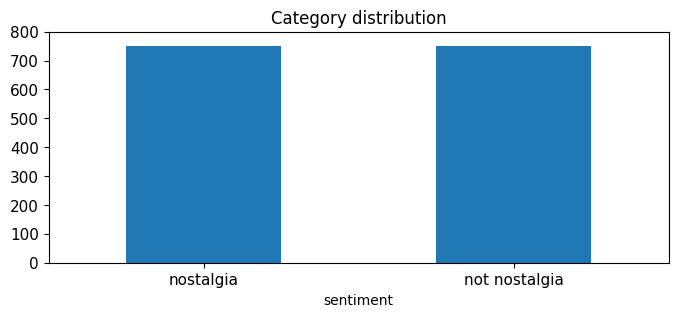

In [14]:
import numpy as np
import matplotlib.pyplot as plt
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind="bar",
                                title="Category distribution",
                                ylim=[0, 800],
                                rot=0, fontsize=11, figsize=(8, 3))

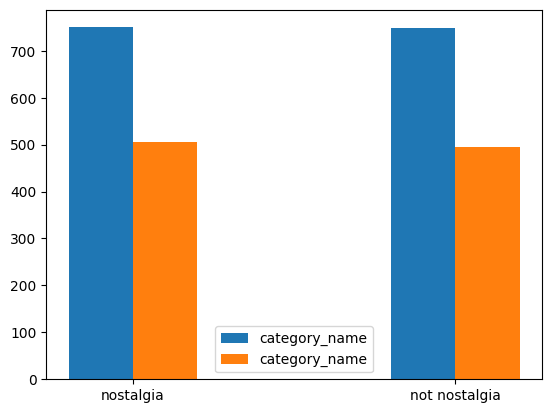

In [15]:
vc1 = X.sentiment.value_counts()
vc2 = X_sample.sentiment.value_counts()
x = np.arange(len(vc1))
width = 0.2
offset = width / 2
plt.bar(x=x - offset, height=vc1, width=width, label="category_name")
plt.bar(x=x + offset, height=vc2, width=width, label="category_name")
plt.xticks(x, vc1.index)
plt.legend()
plt.show()

### Feature Creation   

In [16]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[:4]

[nltk_data] Downloading package punkt to
[nltk_data]     /home/master/13/r13922163/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

### Feauture subset selection

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])
print(f'feature for index 1598: {count_vect.get_feature_names_out()[1598]}')

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
feature for index 1598: he


In [18]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [19]:
X_counts.shape

(1499, 3730)

In [20]:
count_vect.get_feature_names_out()[:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [21]:
X_counts[:5, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [22]:
# feature name of the forth record's nonzero value
index = np.where(np.squeeze(X_counts[3, :100].toarray()) == 1)
count_vect.get_feature_names_out()[index]

array(['1st', '2nd', '30'], dtype=object)

### Plotting

In [23]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[:20]]
# obtain document index
plot_y = ["comment_"+ str(i) for i in list(X.index)[:20]]

plot_z = X_counts[:20, :20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

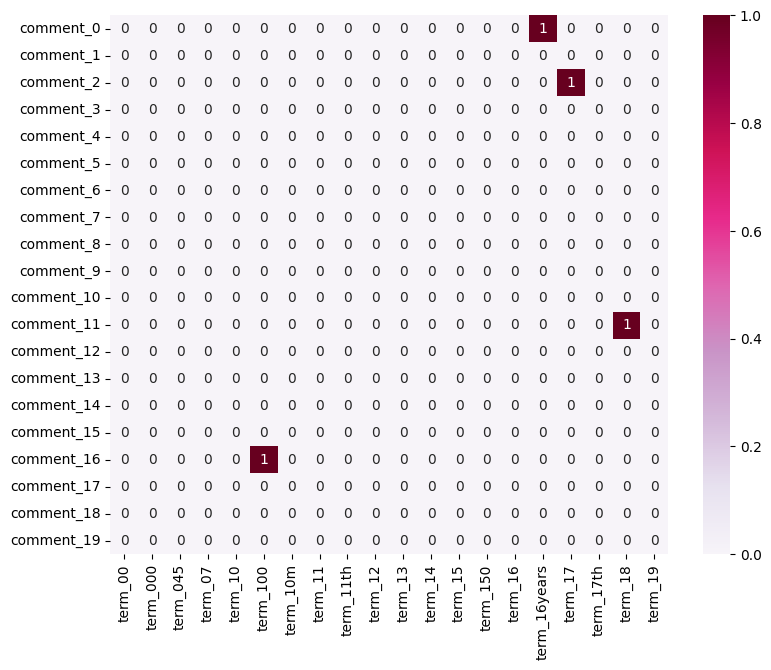

In [24]:
# heatmap
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

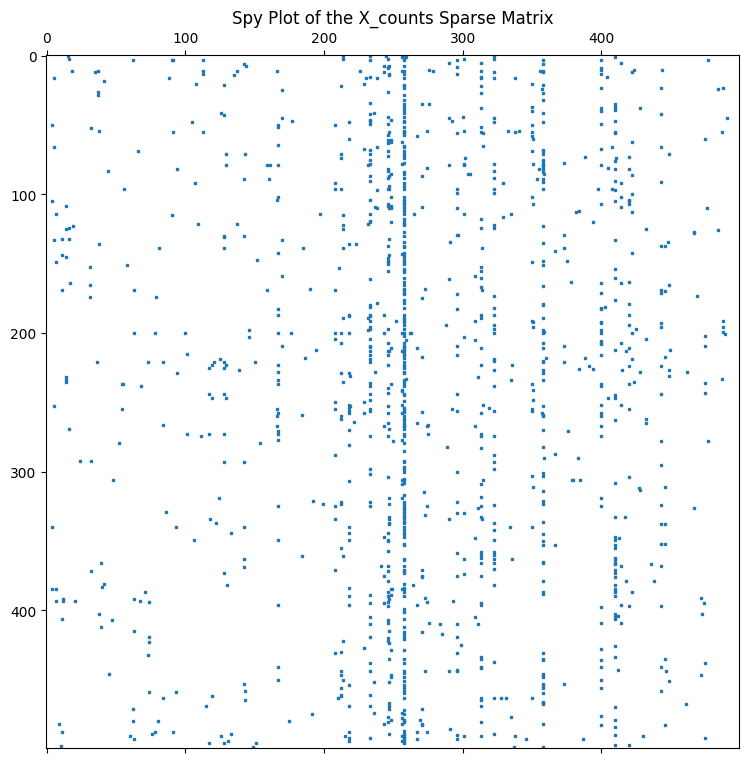

In [25]:
# spy plot
plt.figure(figsize=(9, 9))
plot_z = X_counts.toarray()[:500, :500]
plt.spy(plot_z, markersize=2)
plt.title("Spy Plot of the X_counts Sparse Matrix")
plt.show()

### Attribute Transformation / Aggregation

In [26]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([1, 2, 1, ..., 1, 1, 1])

/tmp/ipykernel_2052514/1135719481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


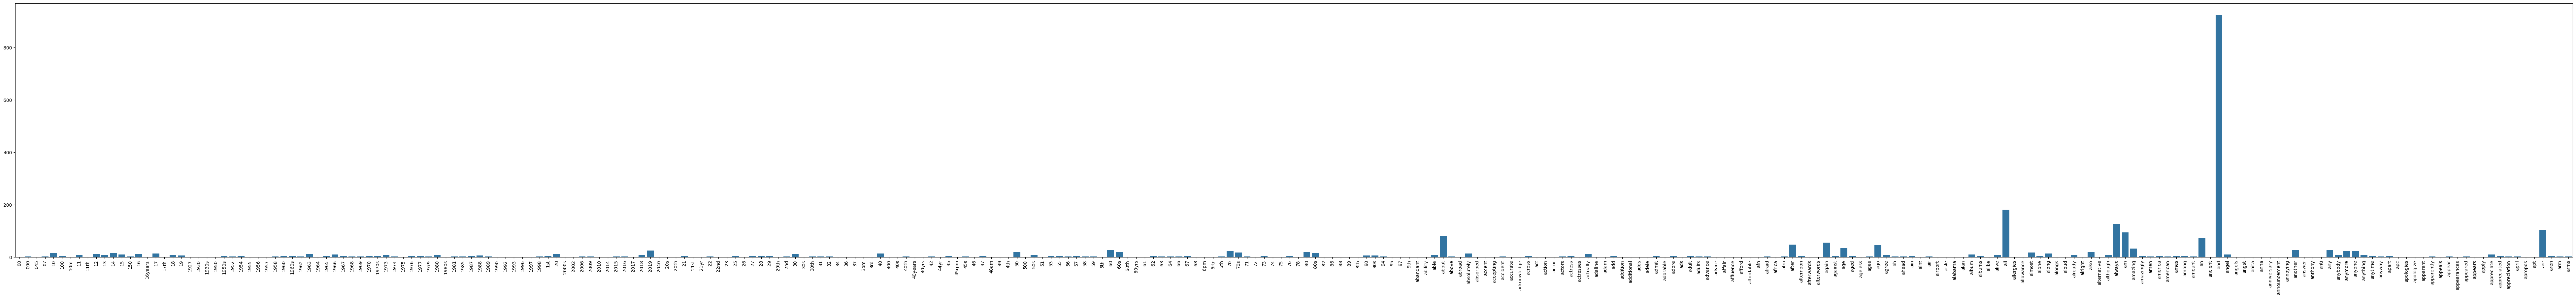

In [27]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [28]:
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
fig.show()

In [29]:
# only show the top N most frequent terms for better visualization
limit = 50
limited_count_vect = CountVectorizer(max_features=limit)  # Limit to the most frequent terms

limited_X_counts = limited_count_vect.fit_transform(X.comment)

limited_term_frequencies = np.array(limited_X_counts.sum(axis=0))[0]

fig = px.bar(x=limited_count_vect.get_feature_names_out(),
            y=limited_term_frequencies)
fig.show()

In [30]:
# long tail
sorted_indices = np.argsort(term_frequencies)[::-1][:100]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

fig = px.bar(x=sorted_terms,
            y=sorted_frequencies)
fig.show()

/tmp/ipykernel_2052514/3323434202.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



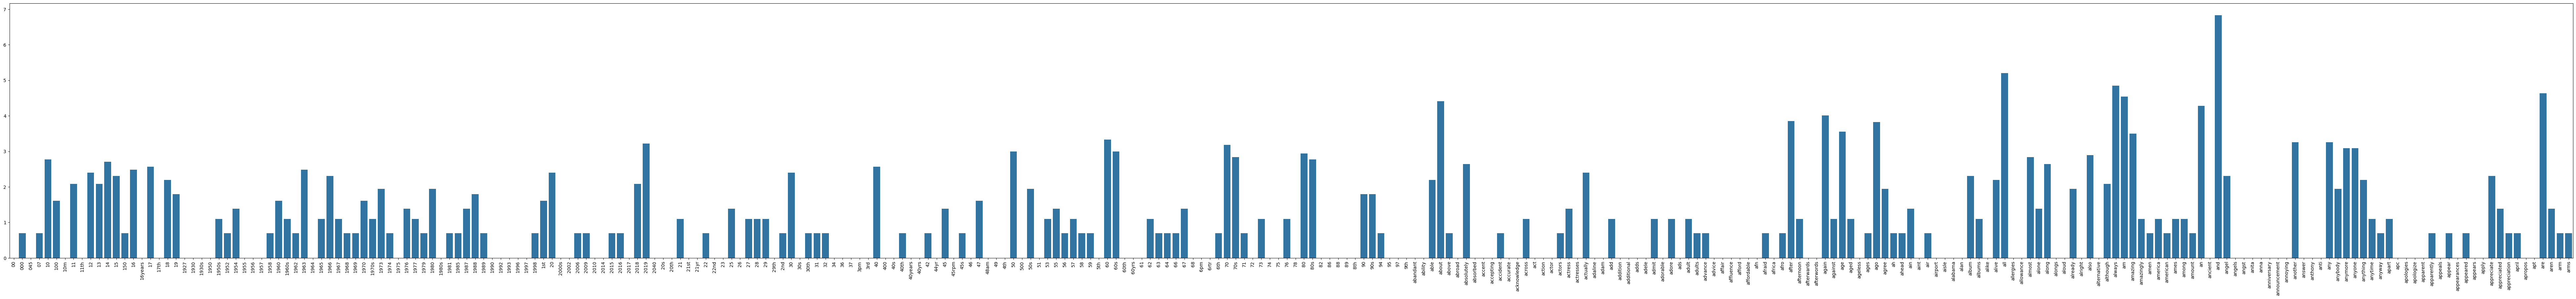

In [31]:
# log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [32]:
# log distribution with sorted indice

sorted_indices_log = np.argsort(term_frequencies_log)[::-1][:100]
sorted_terms_log = count_vect.get_feature_names_out()[sorted_indices_log]
sorted_frequencies_log = np.array(term_frequencies_log)[sorted_indices_log]

fig = px.bar(x=sorted_terms_log,
            y=sorted_frequencies_log)
fig.show()

### Finding frequent patterns

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment'].unique()
sentiment_dfs = {}

for s in sentiments:
    sentiment_dfs[s] = X[X['sentiment'] == s].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])

    words = count_vect.get_feature_names_out()

    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

filt_term_document_dfs = {}

for s in sentiments:
    filt_term_document_dfs[s] = create_term_document_df(sentiment_dfs[s])

In [34]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

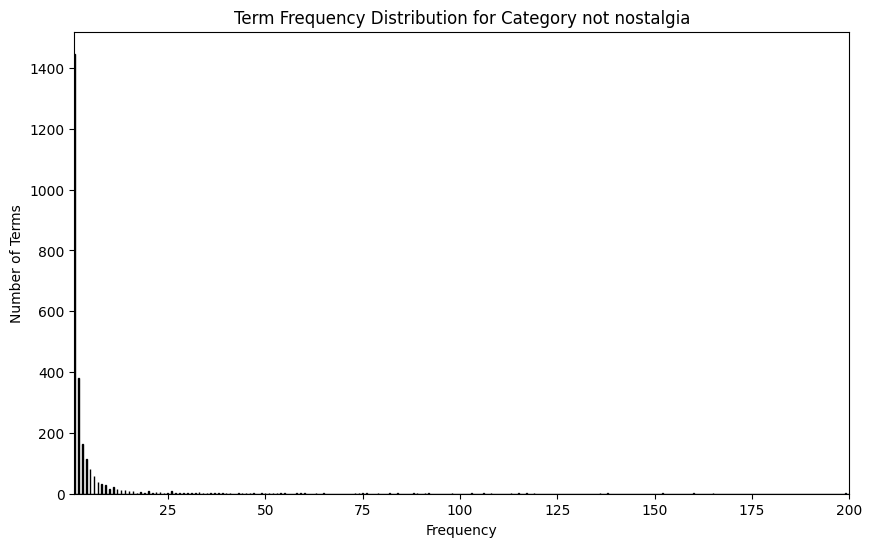

In [35]:
 # Sum over all comments to get total frequency for each word
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [36]:
# filter top 5%
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'not', 'what', 'on', 'be', 'can', 'voice', 'me', 'just', 'songs', 'as', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'about', 'much', 'who', 'really', 'if', 'we', 'more', 'best', 'by', 'ever', 'thank', 'think', 'would', 'only', 'don', 'still', 'how', 'has', 'very', 'am', 'there', 'out', 'could', 'him', 'these', 'old', 'up', 'do', 'listen', 'hear', 'an', 'singer', 'had', 'many', 'here', 'too', 'version', 'such', 'today', 'been', 'most', 'get', 'world', 'people', 'your', 'man', 'heard', 'some', 'video', 'listening', 'sing', 'years', 'real', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'its', 'day', 'sad', 'those', 'then', 'god',

In [37]:
# filter bottom 1 %
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['20th', '21st', '21yr', '28', '30s', '30th', '32', '37', '1952', '1955', '1957', '12', '2010', '2017', '2018', '2040', 'worthwhile', '64', '67', '74', '76', '95', '1930', '1930s', 'wonderfully', 'wondering']


In [38]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for s in sentiments:
    print(f'\nFor category {s} we filter the following words:')
    term_document_dfs[s] = filter_top_bottom_words_by_sum(filt_term_document_dfs[s])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
20th           1
21st           1
21yr           1
28             1
30s            1
30th           1
32             1
37             1
1952           1
1955           1
1957           1
12             1
2010           1
2017           1
2018           1
2040           1
worthwhile     1
64             1
67             1
74             1
76             1
95             1
1930           1
1930s          1
wonderfully    1
wondering      1
dtype: int64
Top 5.0% words: 
them        23
amazing     23
got         23
wish        24
or          25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
1964          1
1969          1
1975          1
1980s         1
1981          1
wonderfull    1
wood          1
working       1
mad           1
maddox        1
madrid        1
maggie 

00  000  045  10  100  10m  11  14  15  150  ...  younger  youngest  \
0     0    0    0   0    0    0   0   0   0    0  ...        0         0   
1     0    0    0   0    0    0   0   0   0    0  ...        0         0   
2     0    0    0   0    0    0   0   0   0    0  ...        0         0   
3     0    0    0   0    0    0   0   0   0    0  ...        0         0   
4     0    0    0   0    0    0   0   0   0    0  ...        0         0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...      ...       ...   
744   0    0    0   0    0    0   0   0   0    0  ...        0         0   
745   0    0    0   0    0    0   0   0   0    0  ...        0         0   
746   0    0    0   0    0    0   0   0   0    0  ...        0         0   
747   0    0    0   0    0    0   0   0   0    0  ...        0         0   
748   0    0    0   0    0    0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

In [39]:
# compare similarities and differences
term_document_sets = [set(term_document_dfs[s].columns) for s in sentiments]

similarities = term_document_sets[0] & term_document_sets[1]
print(f"word in all 2 categories: {similarities}")

for i in range(2):
    diff = term_document_sets[i]
    for j in range(2):
        if i != j:
            diff = diff - term_document_sets[j]
    print(f"word only in {sentiments[i]}: {diff}")


word in all 2 categories: {'existed', 'lord', 'which', 'appear', 'previous', 'name', 'women', 'across', 'found', 'late', 'lot', 'wife', 'granddaughter', 'gorgeous', 'truly', 'gary', 'teacher', 'broken', 'together', 'wow', 'groups', 'work', 'front', 'white', 'rock', 'january', 'done', 'captured', 'crap', 'angel', 'dickie', 'own', 'bring', 'attractive', 'exactly', 'brilliant', 'south', 'watching', 'things', 'boys', 'didn', 'sleep', 'innocence', 'funny', 'depressing', 'early', 'commercial', 'oh', 'beauty', 'amount', 'forgotten', 'collection', 'singles', 'away', 'tune', '19', 'omg', 'ones', 'see', 'southern', 'dates', 'appreciation', 'haven', 'primary', 'longer', 'high', 'uncles', 'rightly', 'soldiers', 'inside', 'valentine', 'charts', 'minutes', 'whole', 'fear', 'unbelievable', 'cant', 'audio', 'sunset', 'harmonies', 'fire', 'course', 'pretty', 'snow', 'suddenly', 'boyfriend', 'child', 'seemed', 'dont', 'alive', 'drinking', 'track', '50s', 'reeves', '60s', 'peace', 'might', 'film', 'april

In [40]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for s in sentiments:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[s])
    obj.convert2TransactionalDatabase(f'td_freq_db_{s}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.227146505233724
Variance in Transaction Sizes : 52.30290397046961
Sparsity : 0.9959733855996001


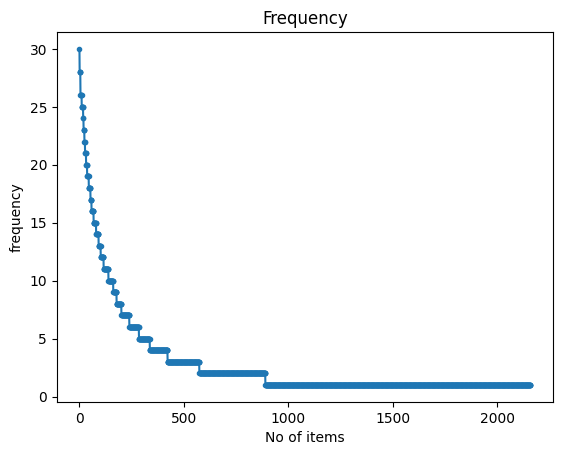

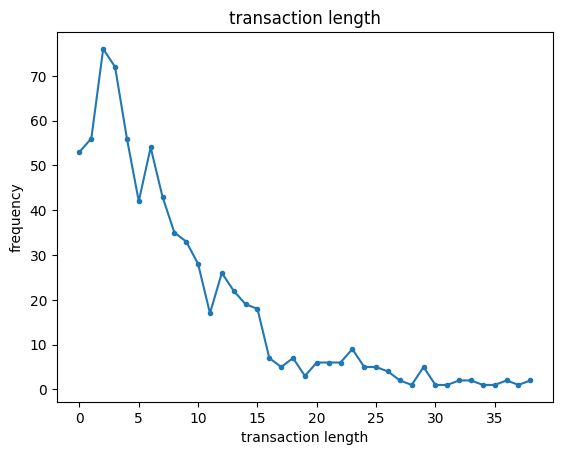

In [41]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.400804289544237
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.923683496167718
Variance in Transaction Sizes : 35.137126869028556
Sparsity : 0.9965654929315028


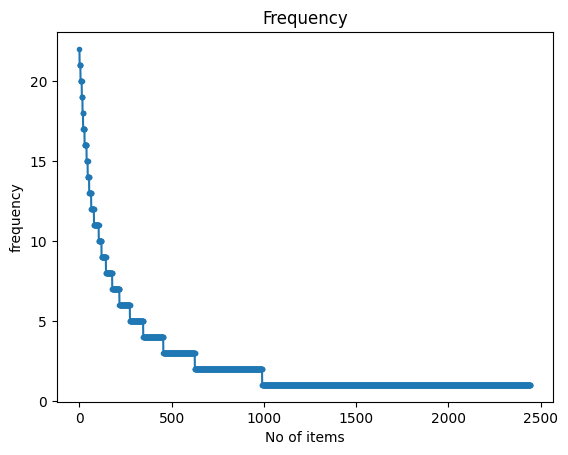

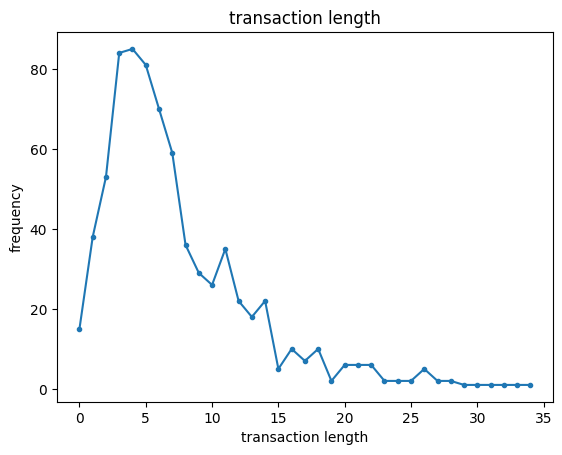

In [42]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [43]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01857161521911621


In [44]:
obj1.save('freq_patterns_nostalgia.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [45]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.023803234100341797


In [46]:
obj2.save('freq_patterns_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142     lyrics       21
143      first       22

[144 rows x 2 columns]

In [47]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
128     will       28
127    would       28
126     ever       28
124       or       26
125     wish       26
..       ...      ...
137     pure        9
138   please        9
139   though        9
140   wonder        9
141   person        9

[222 rows x 2 columns]
Number of patterns discarded: 102


In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])
terms = count_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  end  family  ones  \
0      0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1      0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
2      0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
3      0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
4      0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...  ...     ...   ...   
1495   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1496   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1497   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1498   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1499   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   

      things  others  pure  please  though  wonder  person  
0          0       0     0       0       0       0       0  
1          0       0     0       0       0       0       0  
2          0       0     0       0       0       0       0  
3          0       0     0       0       0       0       0  
4          0       0     0       0       0       0       0  
...      ...     ...   ...     ...     ...     ...     ...  
1495       0       0     0       0       0       0       0  
1496       0       0     0       0       0       0       0  
1497       0       0     0       0       0       0       0  
1498       0       1     0       0       0       0       0  
1499       0       0     0       0       0       0       0  

[1499 rows x 3952 columns]

In [49]:
# Answer Here
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup=[3, 6, 9]
for ms in minSup:
    print(f'minSup = {ms}')
    obj = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=ms)
    obj.mine()
    frequentPatternsDF_nostalgia = obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF_nostalgia)

import PAMI.frequentPattern.topk.FAE as alg

Ks = [100, 200, 300]
for k in Ks:
    print(f'k = {k}')
    obj = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    obj.mine()
    frequentPatternsDF_nostalgia = obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF_nostalgia)

minSup = 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 682
Runtime: 0.0365908145904541
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]
minSup = 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 274
Runtime: 0.026631832122802734
      Patterns  Support
0        1973         6
1     looking         6
2    actually         6
3        fast         6
4    innocent         6
..         ...      ...
269      only        26
270       kid        26
271     would        28
272      ever        28
273  favorite        30

[274 rows x 2 columns]
minSup = 9
Maxim

### Dimensionality Reduction

In [50]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)

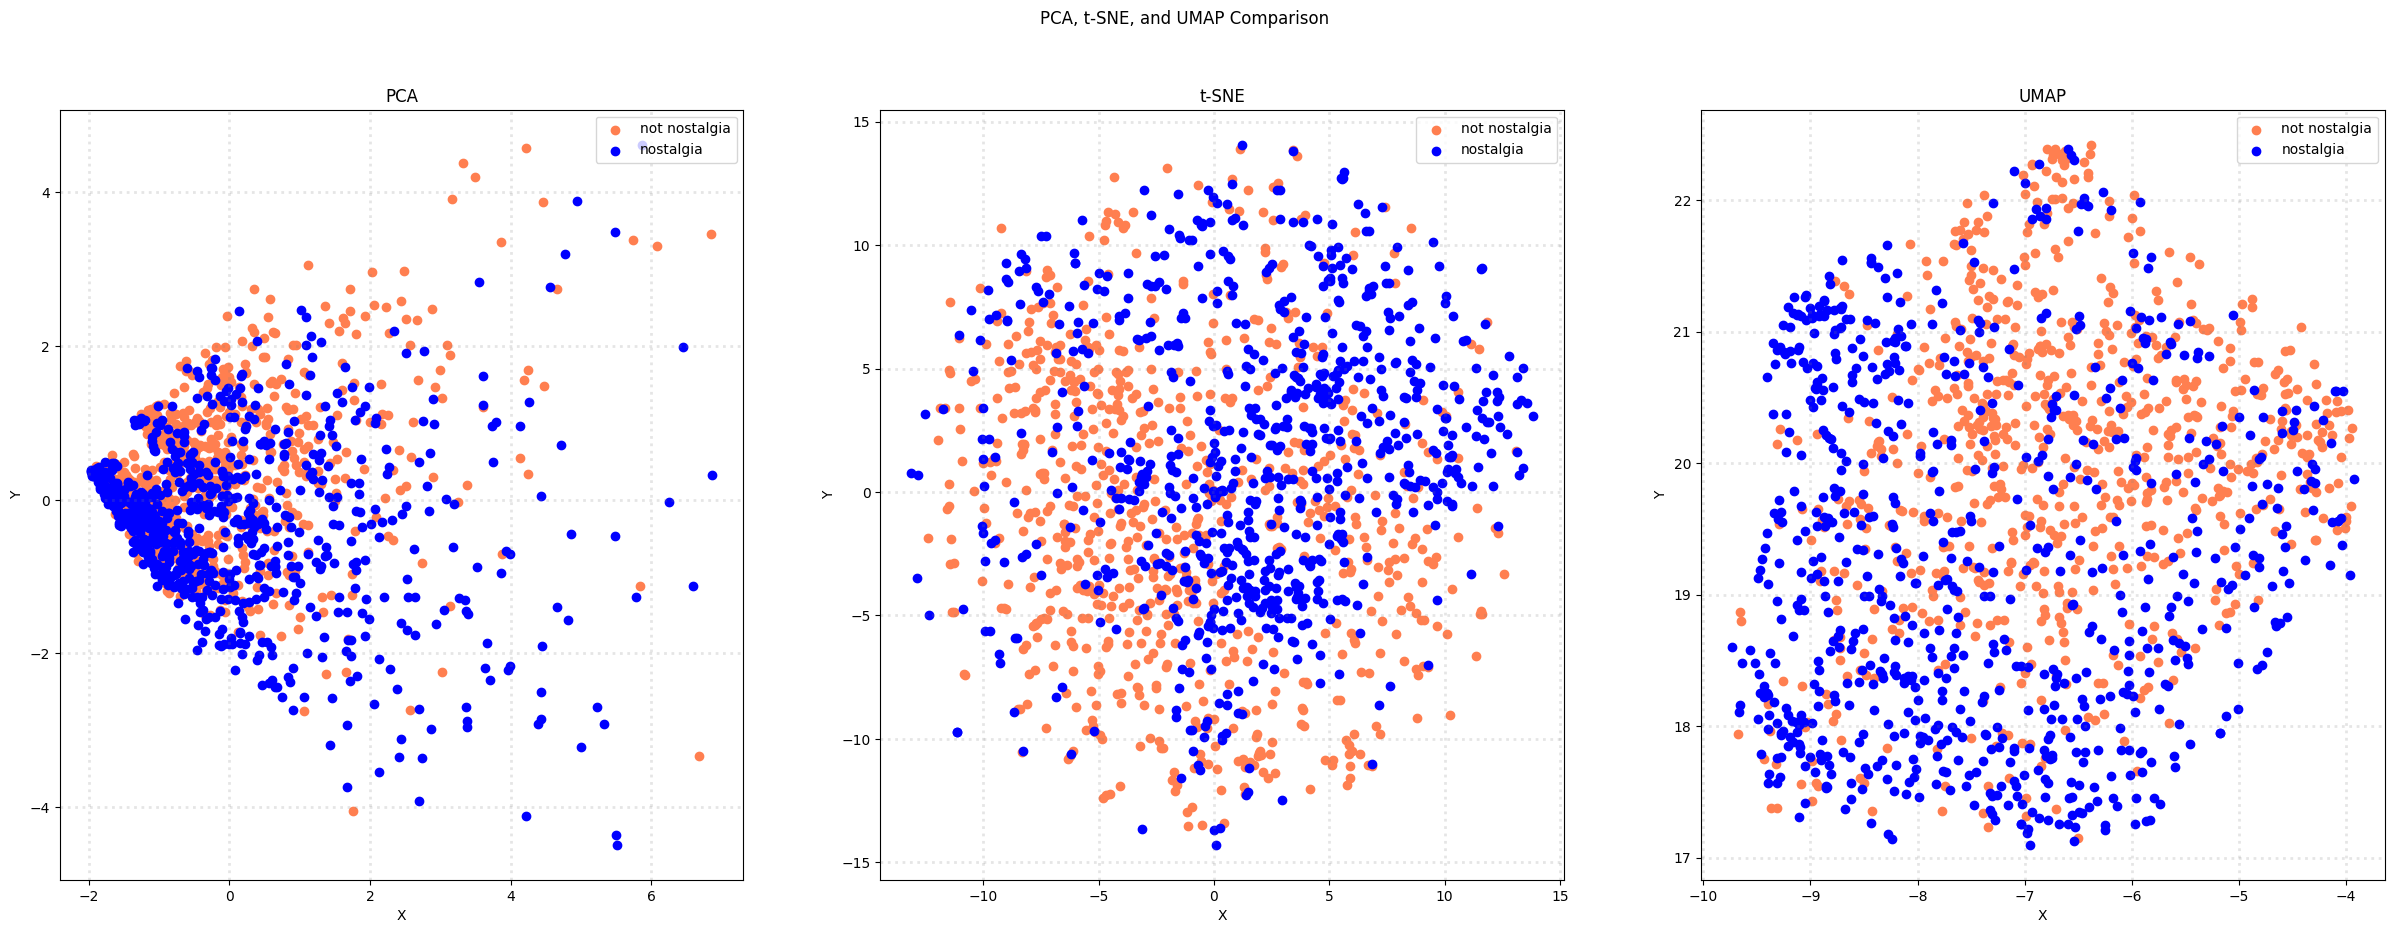

In [51]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, s in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == s].T[0]
        ys = X_reduced[X['sentiment'] == s].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=s)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [52]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

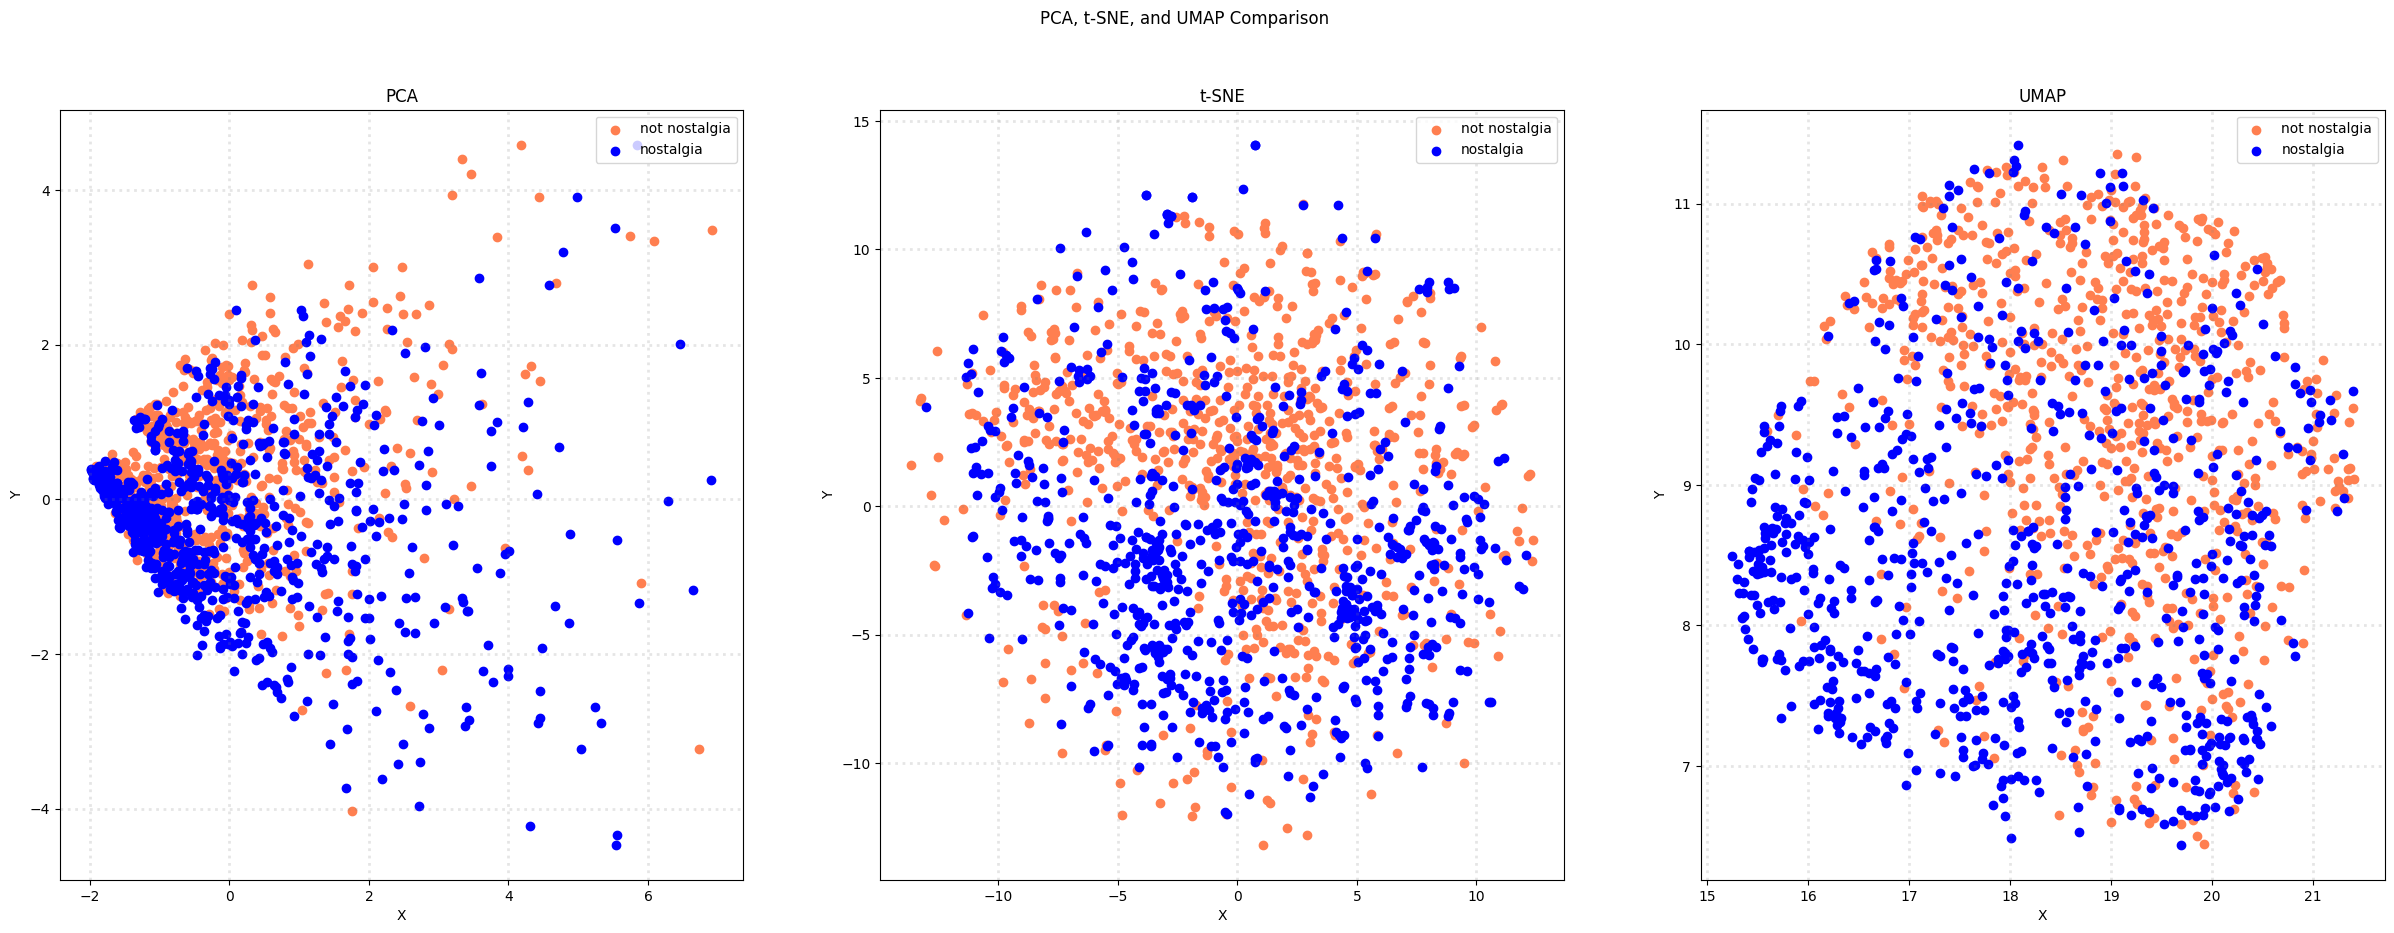

In [53]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, s in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == s].T[0]
        ys = X_reduced[X['sentiment'] == s].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=s)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [54]:
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)

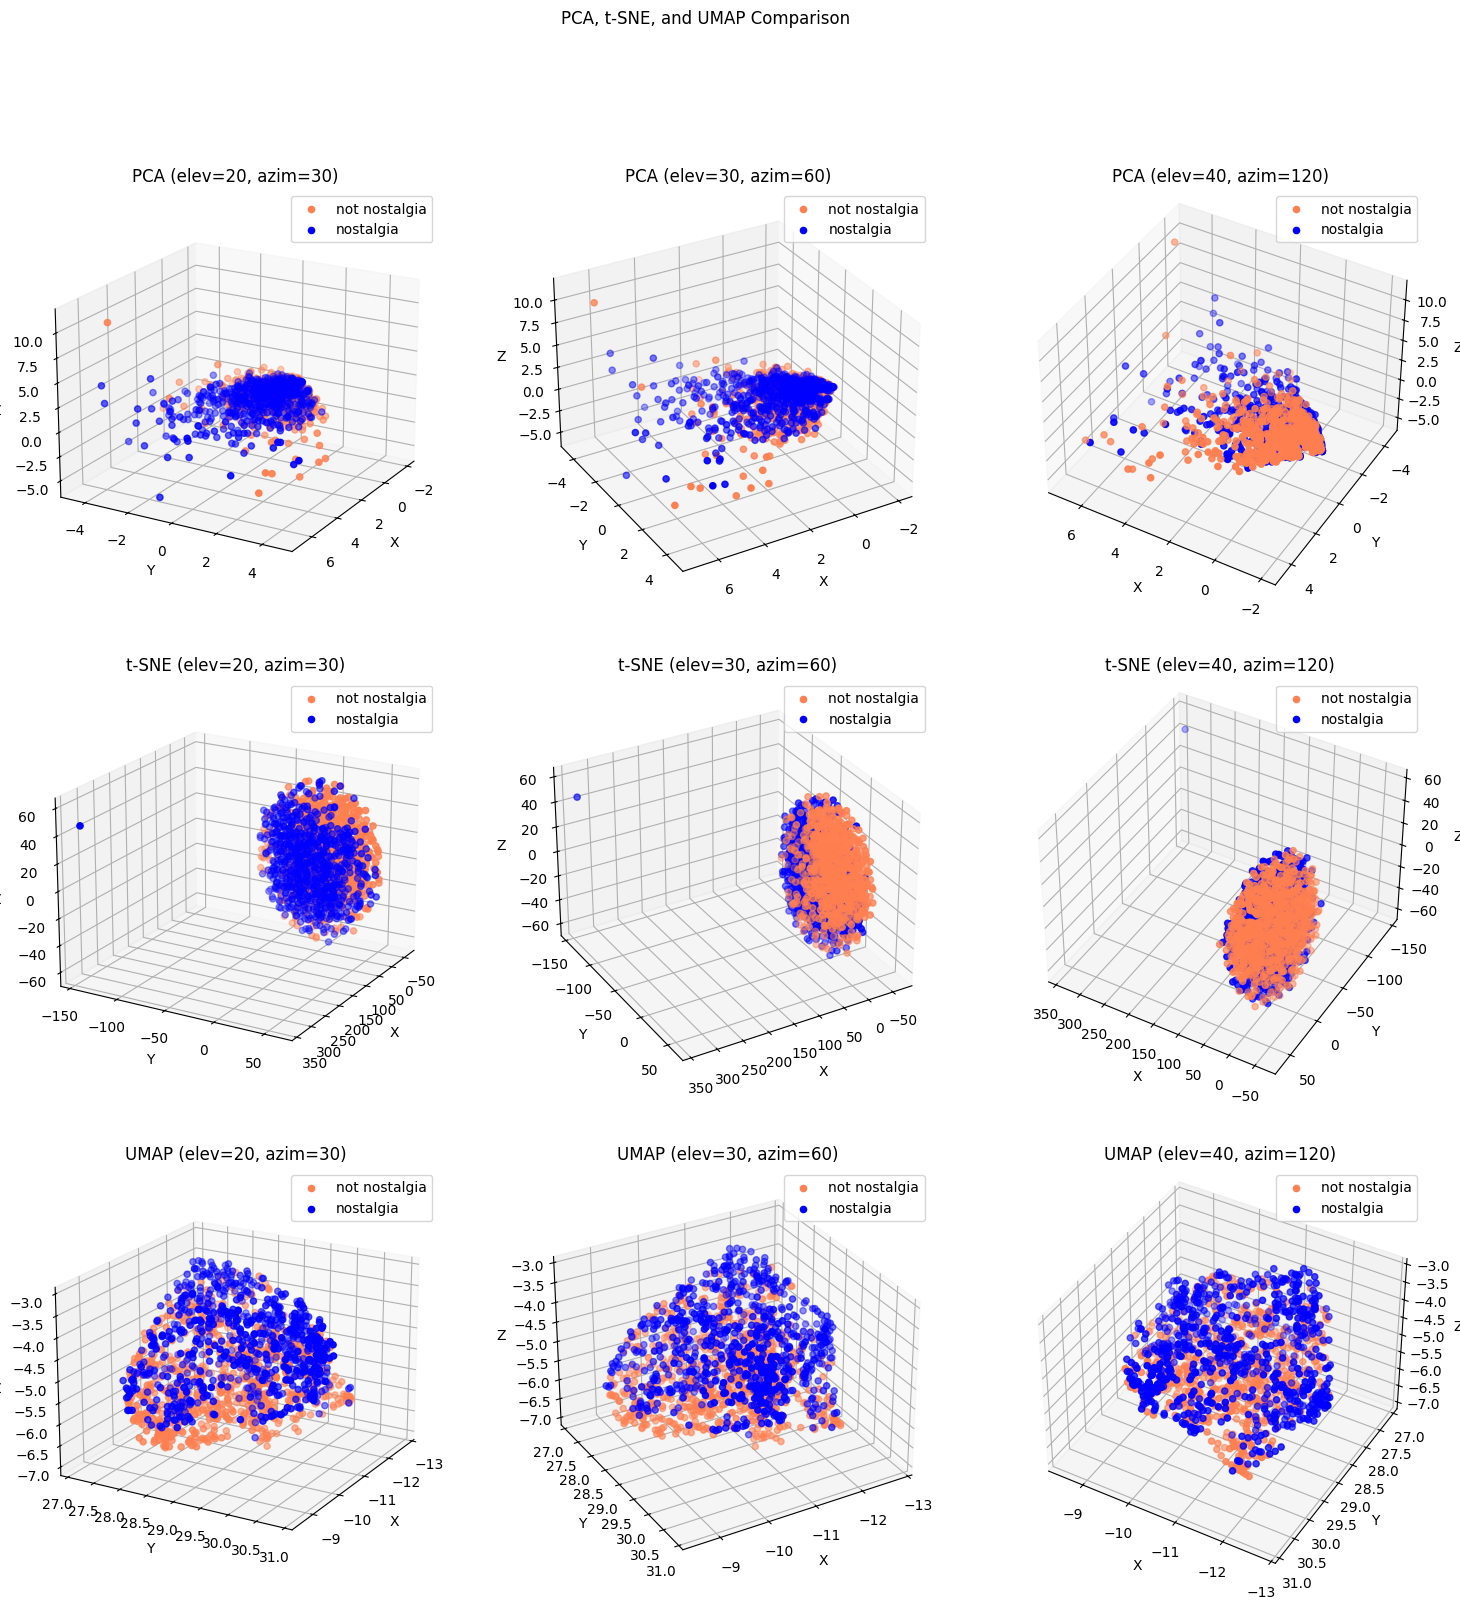

In [55]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(3, 3, figsize=(18, 18), subplot_kw={'projection': '3d'})

fig.suptitle('PCA, t-SNE, and UMAP Comparison')

view_angles = [(20, 30), (30, 60), (40, 120)]  # Different angles

# Define a function to create a scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title):
    for i, (elev, azim) in enumerate(view_angles):
        for c, s in zip(col, sentiments):
            xs = X_reduced[X['sentiment'] == s].T[0]
            ys = X_reduced[X['sentiment'] == s].T[1]
            zs = X_reduced[X['sentiment'] == s].T[2]
            ax[i].scatter(xs, ys, zs, c=c, marker='o', label=s)
            ax[i].view_init(elev=elev, azim=azim)
            ax[i].set_title(f'{title} (elev={elev}, azim={azim})')

        ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Y')
        ax[i].set_zlabel('Z')
        ax[i].legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(axes[0], X_pca_tdm_3d, 'PCA')
plot_scatter_3d(axes[1], X_tsne_tdm_3d, 't-SNE')
plot_scatter_3d(axes[2], X_umap_tdm_3d, 'UMAP')

plt.show()

###Dicretization and Binarization

In [56]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment'])
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment  bin_sentiment  
0  {to, a, love, age, I, in, singers, can, we, fe...              1  
1  {to, a, singing, love, ever, I, Never, kid, be...              0  
2  {to, a, no, love, grew, gentle, age, songs., I...              0  
3  {1st, to, later, a, This, Nam, greatest, Lou, ...              1  
4  {to, songs, everyday, me, of, played, him, his...              0  
5  {to, a, touches, I, cry....because, reminded, ...              0  
6  {to, a, loved, do, I, in, listening, back, the...              0  
7  {to, a, nostalgic, love, I, ALSO, in, he, musi...              0  
8        {always, Wherever, in, you, heart, are, my}              1

###Data exploration

In [57]:
# We retrieve 3 sentences for a random record
comment_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
comment_to_transform_1.append(random_record_1)

comment_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
comment_to_transform_2.append(random_record_2)

comment_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
comment_to_transform_3.append(random_record_3)

print(comment_to_transform_1)
print(comment_to_transform_2)
print(comment_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [58]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
comment_vector_count_1 = count_vect.transform(comment_to_transform_1)
comment_vector_count_2 = count_vect.transform(comment_to_transform_2)
comment_vector_count_3 = count_vect.transform(comment_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
comment_vector_count_1_bin = binarize(comment_vector_count_1)
comment_vector_count_2_bin = binarize(comment_vector_count_2)
comment_vector_count_3_bin = binarize(comment_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(comment_vector_count_1.todense())
print(comment_vector_count_2.todense())
print(comment_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(comment_vector_count_1, comment_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(comment_vector_count_1, comment_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(comment_vector_count_2, comment_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(comment_vector_count_1, comment_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(comment_vector_count_2, comment_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(comment_vector_count_3, comment_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2.item()})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3.item()})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3.item()})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1.item()})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2.item()})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3.item()})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


###Data Classification

In [60]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['bin_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['bin_sentiment'], test_size=0.3, random_state=42)

In [61]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [62]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [63]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [64]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['bin_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['bin_sentiment'], test_size=0.3, random_state=42)

In [65]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  end  family  ones  \
486    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
528    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
200    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
890    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
845    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...  ...     ...   ...   
1131   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1295   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
861    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1460   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1127   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   

      things  others  pure  please  though  wonder  person  
486        0       0     0       0       0       0       0  
528        0       0     0       0       0       0       0  
200        0       0     0       0       0       0       0  
890        0       0     0       0       0       0       0  
845        0       0     0       0       0       0       0  
...      ...     ...   ...     ...     ...     ...     ...  
1131       0       0     0       0       0       0       0  
1295       0       0     0       0       0       0       0  
861        0       0     0       0       0       0       0  
1460       0       0     0       0       0       0       0  
1127       1       0     0       0       0       0       0  

[1049 rows x 3952 columns]

In [66]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  end  family  ones  \
1117   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1396   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
423    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
414    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
452    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...  ...     ...   ...   
1084   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
991    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
651    0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1188   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   
1459   0    0    0   0   0    0    0   0     0   0  ...    0       0     0   

      things  others  pure  please  though  wonder  person  
1117       0       0     0       0       0       0       0  
1396       0       0     0       0       0       0       0  
423        0       0     0       0       0       0       0  
414        0       0     0       0       0       0       0  
452        0       0     0       0       0       0       0  
...      ...     ...   ...     ...     ...     ...     ...  
1084       0       0     0       0       0       0       0  
991        0       0     0       0       0       0       0  
651        0       0     0       0       0       0       0  
1188       0       0     0       0       0       0       1  
1459       0       0     0       0       0       0       0  

[450 rows x 3952 columns]

In [67]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8216    0.9485    0.8805       233
not nostalgia     0.9337    0.7788    0.8492       217

     accuracy                         0.8667       450
    macro avg     0.8776    0.8636    0.8649       450
 weighted avg     0.8756    0.8667    0.8654       450

